In [1]:
__author__ = "Farzaneh Soltanzadeh"
__email__ = "f.soltanzadeh.f@gmail.com"
__organization__ = "Coursera"
__date__ = "2024-09-28"

Import Libraries 📚

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import plotly.graph_objs as go

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

Sample Dataset 

In [3]:
m = 100 # number of training examples
np.random.seed(11)

X = np.random.rand(m) * 10
Y = 1.3 * X + 5 + (np.random.rand(m)*8)

data = pd.DataFrame({'X': X, 'Y': Y})
data.head()

,X,Y
0,1.802697,9.889004
1,0.194752,6.997205
2,4.632185,17.781349
3,7.249339,16.841459
4,4.202036,13.968412


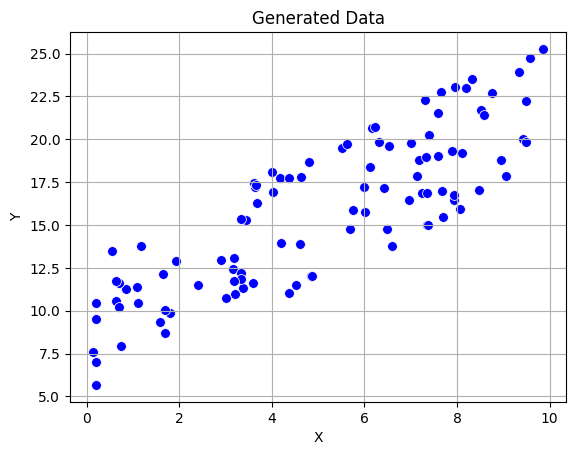

In [4]:
def plot_data(points=data):
    sns.scatterplot(x='X', y='Y', data=data, color='blue', s=50)
    plt.title('Generated Data')
    plt.grid(True)

plot_data()

# Gradient Descent

**Goal**: to find the parameters (W, b) that minimize the cost function J in linear regression.
- **Model**: f(x) = Wx + b
- **Parameters**: W (weight), b (bias)
- **Cost Function**: J = (1/2m) Σ(f(x) - y)²
- **Learning Rate**: α
### Algorithm:
1. Initialize parameters W and b to 0 or small random values.

2. Repeat until convergence or for a fixed number of iterations:
   
   a. Compute predictions: f(x) = Wx + b
   
   b. Calculate gradients:
      - ∂J/∂W = (1/m) Σ((f(x) - y) * x)
      - ∂J/∂b = (1/m) Σ(f(x) - y)
   
   c. Update parameters:
      - W = W - α * (∂J/∂W)
      - b = b - α * (∂J/∂b)

### Batch Gradient Descent

In [5]:
def batch_gradient_descent(X, Y, learning_rate=0.01, epochs=3000, tolerance=1e-6, show_detail=False):
    logging.info("BGD process...")
    W, b = 0, 0
    m = len(X)
    weight_history, loss_history = [], []
    
    for epoch in range(epochs):
        y_pred = W * X + b
        
        loss = (1 / (2 * m)) * np.sum((y_pred - Y) ** 2)
        loss_history.append(loss)
        weight_history.append((W, b))

        if show_detail:
            logging.info(f"Epoch {epoch + 1}: W = {W:.6f}, b = {b:.6f}, Loss = {loss:.6f}")
        
        # Check for convergence
        if epoch > 0 and abs(loss_history[-2] - loss_history[-1]) < tolerance:
            logging.info(f"Converged at epoch {epoch + 1}")
            break
        
        # Update weights
        dW = (1 / m) * np.dot((y_pred - Y), X)
        db = (1 / m) * np.sum(y_pred - Y)
        W -= learning_rate * dW
        b -= learning_rate * db
    
    return W, b, loss_history, weight_history

In [6]:
# Training the model

W, b, loss_history, weight_history = batch_gradient_descent(data["X"], data["Y"])
logging.info(f"Final weights: W = {W:.6f}, b = {b:.6f}")

2024-09-28 19:52:37,148 - INFO - BGD process...


2024-09-28 19:52:40,042 - INFO - Converged at epoch 2286
2024-09-28 19:52:40,044 - INFO - Final weights: W = 1.327833, b = 9.078104


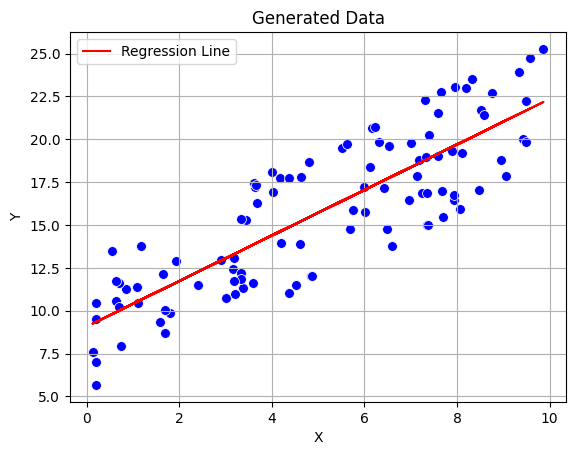

In [7]:
def plot_regressionLine(W, b):
    plot_data()

    # Plot the regression line
    x_values = data["X"] #OR: x_values = np.linspace(data["X"].min(), data["X"].max()) 
    ''' Both methods are valid, so it depends on your specific needs for the plot. 
    If you want the regression line to pass through the actual data points, use data["X"]. 
    If you prefer a smoother line, use np.linspace.
    '''
    y_values = W * x_values + b
    plt.plot(x_values, y_values, color='red', label='Regression Line')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_regressionLine(W, b)

In [9]:
def plot_history(loss_history, weight_history):
    # the loss history
    fig1 = go.Figure()
    
    fig1.add_trace(go.Scatter(
        x = list(range(len(loss_history))),  
        y = loss_history,                   
        mode = 'lines',                     
        name = 'Loss',                      
        line = dict(color='blue')           
            ))
    
    fig1.update_layout(
        title='Loss History',
        xaxis_title='Iteration',
        yaxis_title='Loss',
        xaxis=dict(showgrid=True, gridcolor='darkGray'),
        yaxis=dict(showgrid=True, gridcolor='darkGray')
            )
    # fig1.write_image("plots/loss_history.png")
    fig1.show()

    
    # Plot Weight (W) and Bias (b)
    W_history, b_history = zip(*weight_history)
    fig2 = go.Figure()
    
    fig2.add_trace(go.Scatter(x=list(range(len(W_history))), y=W_history, mode='lines', name='Weight (W)', line=dict(color='green')))
    fig2.add_trace(go.Scatter(x=list(range(len(b_history))), y=b_history, mode='lines', name='Bias (b)', line=dict(color='orange')))

    fig2.update_layout(
        title='Training History',
        xaxis_title='Iteration',
        yaxis_title='Values',
        xaxis=dict(showgrid=True, gridcolor='darkGray'),
        yaxis=dict(showgrid=True, gridcolor='darkGray')
        )
    # fig2.write_image("plots/Wb_history.png")
    fig2.show()


plot_history(loss_history, weight_history)

### Stochastic Gradient Descent


In [141]:
def stochastic_gradient_descent(X, Y, learning_rate=0.001, epochs=40, show_detail=False):
    logging.info("SGD process...")
    W, b = 0, 0  
    m = len(X)
    weight_history, loss_history = [], []
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(m)
        X, Y = X[indices], Y[indices]
        
        for i in range(m):
            xi, yi = X[i], Y[i]
            yi_pred = W * xi + b
    
            weight_history.append((W, b))
            loss = abs(yi - yi_pred) 
            loss_history.append(loss)

            if show_detail:
                logging.info(f"Epoch {epoch+1}, Data Point{i+1}: W = {W:.6f}, b = {b:.6f}, Loss = {loss:.6f}")
            
            # Update weights
            dW = (yi_pred - yi) * xi
            db = (yi_pred - yi)
            W -= learning_rate * dW
            b -= learning_rate * db
    
    return W, b, loss_history, weight_history


In [142]:
# Training the model
W, b, loss_history, weight_history = stochastic_gradient_descent(data["X"], data["Y"])
logging.info(f"Final weights: W = {W:.6f}, b = {b:.6f}")

2024-09-28 19:01:12,727 - INFO - SGD process...


2024-09-28 19:01:12,987 - INFO - Final weights: W = 1.817543, b = 5.675796


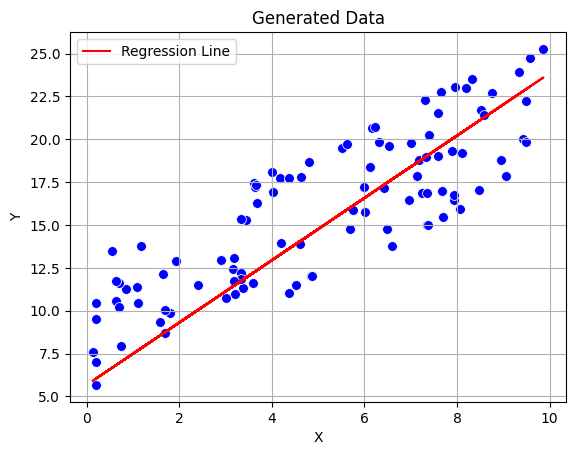

In [143]:
plot_regressionLine(W, b)

In [144]:
plot_history(loss_history, weight_history)

### Mini-Batch Gradient Descent

In [145]:
def mini_batch_gradient_descent(X, Y, learning_rate=0.01, epochs=100, batch_size=20, show_detail=False):
    logging.info("MBGD process...")
    W, b = 0, 0
    m = len(X)
    num_batches = m // batch_size
    weight_history, loss_history = [], []

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(m)
        X, Y = X[indices], Y[indices]

        for i in range(0, m, batch_size):
            X_batch = X[i:i + batch_size]
            Y_batch = Y[i:i + batch_size]

            y_pred = W * X_batch + b

            weight_history.append((W, b))
            loss = (1 / (2 * batch_size)) * np.sum((Y_batch - y_pred) ** 2)
            loss_history.append(loss)
            if show_detail:
                logging.info(f"Epoch {epoch + 1}, Batch {i // batch_size + 1}: W = {W:.6f}, b = {b:.6f}, Loss = {loss:.6f}")
            

            # Update weights
            dW = (1 / batch_size) * np.sum((y_pred - Y_batch) * X_batch)
            db = (1 / batch_size) * np.sum(y_pred - Y_batch)
            W = W - learning_rate * dW
            b = b - learning_rate * db

    return W, b, loss_history, weight_history

In [146]:
# Training the model
W, b, loss_history, weight_history = mini_batch_gradient_descent(data["X"], data["Y"])
logging.info(f"Final weights: W = {W:.6f}, b = {b:.6f}")

2024-09-28 19:01:14,422 - INFO - MBGD process...
2024-09-28 19:01:16,258 - INFO - Final weights: W = 1.714686, b = 6.403738


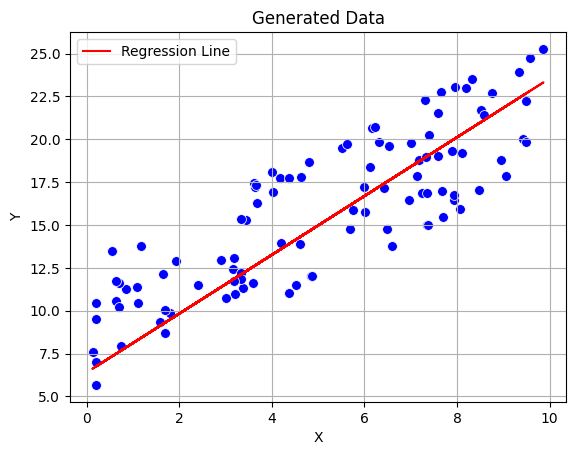

In [147]:
plot_regressionLine(W, b)

In [148]:
plot_history(loss_history, weight_history)